In [1]:
import numpy as np
from _base_network import _baseNetwork
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = np.array([0,1,0,1,1])
b = np.array([1,1,0,1,0])

np.sum((a == b))

3

In [3]:
data = pd.read_csv('MNIST_CSV/mnist_test.csv',header=None,delimiter=',')
X = data.loc[:,1:].to_numpy()
y = data[0].to_numpy()

7


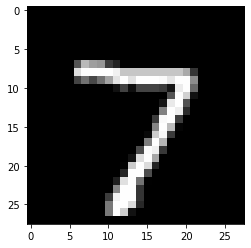

In [4]:
print(y[0])
plt.imshow(np.reshape(X[0],(28,28)),'gray')

In [5]:
yt = [0,2,3,4,5]
pred = np.arange(1,51)
pred = np.reshape(pred,(5,10))
print(pred)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]
 [31 32 33 34 35 36 37 38 39 40]
 [41 42 43 44 45 46 47 48 49 50]]


In [6]:
pred[range(len(yt)),yt]

array([ 1, 13, 24, 35, 46])

In [7]:
a = np.arange(10)
a-np.max(a)

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0])

In [8]:
# np.eye(10)
class_labels = [i for i in range(10)]

one_hot = np.eye(10)[np.vectorize(lambda c: class_labels[c])(yt).reshape(-1)]
for ty in range(len(yt)):
    one_hot[ty] = yt[ty] * one_hot[ty]
print(one_hot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]]


In [57]:
class _BaseOptimizer:
    def __init__(self, learning_rate=1e-4, reg=1e-3):
        self.learning_rate = learning_rate
        self.reg = reg

    def update(self, model):
        pass

    def apply_regularization(self, model):
        """
        Apply L2 penalty to the model. Update the gradient dictionary in the model
        :param model: The model with gradients
        :return: None, but the gradient dictionary of the model should be updated
        """

        #############################################################################
        # TODO:                                                                     #
        #    1) Apply L2 penalty to model weights based on the regularization       #
        #       coefficient                                                         #
        #############################################################################
        
        
        self.penalty = 1/2*self.reg*np.sum(np.square(model.weights['W1']))

In [54]:
class SGD(_BaseOptimizer):
    def __init__(self, learning_rate=1e-4, reg=1e-3):
        super().__init__(learning_rate, reg)

    def update(self, model):
        """
        Update model weights based on gradients
        :param model: The model to be updated
        :return: None, but the model weights should be updated
        """
        self.apply_regularization(model)
        #############################################################################
        # TODO:                                                                     #
        #    1) Update model weights based on the learning rate and gradients       #
        #############################################################################
        model.weights['W1'] = model.weights['W1'] - self.learning_rate * (model.gradients + self.penalty)


In [58]:
class SoftmaxRegression(_baseNetwork):
    def __init__(self, input_size=28 * 28, num_classes=10):
        """
        A single layer softmax regression. The network is composed by:
        a linear layer without bias => (activation) => Softmax
        :param input_size: the input dimension
        :param num_classes: the number of classes in total
        """
        super().__init__(input_size, num_classes)
        self._weight_init()

    def _weight_init(self):
        '''
        initialize weights of the single layer regression network. No bias term included.
        :return: None; self.weights is filled based on method
        - W1: The weight matrix of the linear layer of shape (num_features, hidden_size)
        '''
        np.random.seed(1024)
        self.weights['W1'] = 0.001 * np.random.randn(self.input_size, self.num_classes)
        self.gradients = np.zeros((self.input_size, self.num_classes))
                
    def one_hot(self,y):
        class_labels = [i for i in range(10)]
        one_hot = np.eye(self.num_classes)[np.vectorize(lambda c: class_labels[c])(y).reshape(-1)]
        for i in range(len(y)):
            one_hot[i] = one_hot[i] * y[i]
        return one_hot
    
    def softmax(self, scores):
        f = np.exp(scores - np.max(scores))  # shift values
        return f / np.sum(f)

    def forward(self, X, y, mode='train'):
        """
        Compute loss and gradients using softmax with vectorization.

        :param X: a batch of image (N, 28x28)
        :param y: labels of images in the batch (N,)
        :return:
            loss: the loss associated with the batch
            accuracy: the accuracy of the batch
        """
        loss = None
        gradient = None
        accuracy = None
        #############################################################################
        # TODO:                                                                     #
        #    1) Implement the forward process and compute the Cross-Entropy loss    #
        #    2) Compute the gradient of the loss with respect to the weights        #
        # Hint:                                                                     #
        #   Store your intermediate outputs before ReLU for backwards               #
        #############################################################################

        # Z = X * W
        Z = np.matmul(X,self.weights['W1'])
        A = self.ReLU(Z)
        p = self.softmax(A)
        
        accuracy = self.compute_accuracy(p,y)
        loss = self.cross_entropy_loss(p,y)
        
        


        if mode != 'train':
            return loss, accuracy

        #############################################################################
        # TODO:                                                                     #
        #    1) Implement the backward process:                                     #
        #        1) Compute gradients of each weight by chain rule                  #
        #        2) Store the gradients in self.gradients                           #
        #############################################################################
        
        
        
        error = (1/len(y))*(self.one_hot(y)-p)
        self.gradients = np.dot(error.T,X).T
        
        # self.weights['W1'] = self.weights['W1'] - self.lr * self.gradients
        
        

        return loss, accuracy
    
    
    def train(self,X,y,epochs,batch_size):
        loss_arr = []
        accuracy_arr = []
        sgd = SGD(learning_rate=1e-5)
    
        for epoch in range(epochs):
            X_batch = X[epoch*batch_size:epoch*batch_size+batch_size]
            y_batch = y[epoch*batch_size:epoch*batch_size+batch_size]
            
            loss,accuracy = self.forward(X_batch,y_batch,'train')
            print(f"Epoch # {epoch+1}/{epochs} === Accuracy: {accuracy}, Loss: {loss}")
            
            sgd.update(self)
            
            loss_arr.append(loss)
            accuracy_arr.append(accuracy)
            print("")
            
        return loss_arr, accuracy_arr
    
data_size = 50
batch_size = 5
epochs = 5

classifier = SoftmaxRegression()
loss, accuracy = classifier.train(X[:data_size],y[:data_size],epochs,batch_size)

Epoch # 1/5 === Accuracy: 0.0, Loss: 6.0980030818603455

Epoch # 2/5 === Accuracy: 0.0, Loss: 6.082539415919048

Epoch # 3/5 === Accuracy: 0.4, Loss: 5.173443585944618

Epoch # 4/5 === Accuracy: 0.0, Loss: 8.744642014741991

Epoch # 5/5 === Accuracy: 0.0, Loss: 8.404311710212468



In [10]:
batch_size = 5
for epoch in range(10):
    print(f"{epoch*batch_size}:{epoch*batch_size+batch_size}")

0:5
5:10
10:15
15:20
20:25
25:30
30:35
35:40
40:45
45:50
